<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Общий-график" data-toc-modified-id="Общий-график-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Общий график</a></span></li><li><span><a href="#Поиндексовые-графики" data-toc-modified-id="Поиндексовые-графики-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Поиндексовые графики</a></span><ul class="toc-item"><li><span><a href="#График-по-месяцам" data-toc-modified-id="График-по-месяцам-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>График по месяцам</a></span></li><li><span><a href="#График-по-дням-недели" data-toc-modified-id="График-по-дням-недели-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>График по дням недели</a></span></li><li><span><a href="#График-по-часам" data-toc-modified-id="График-по-часам-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>График по часам</a></span></li></ul></li><li><span><a href="#Графики-сезонности-и-тренда" data-toc-modified-id="Графики-сезонности-и-тренда-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Графики сезонности и тренда</a></span><ul class="toc-item"><li><span><a href="#График-тренда" data-toc-modified-id="График-тренда-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>График тренда</a></span></li><li><span><a href="#График-сезонности" data-toc-modified-id="График-сезонности-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>График сезонности</a></span></li><li><span><a href="#График-остатков" data-toc-modified-id="График-остатков-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>График остатков</a></span></li></ul></li><li><span><a href="#График-разностного-временного-ряда" data-toc-modified-id="График-разностного-временного-ряда-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>График разностного временного ряда</a></span></li><li><span><a href="#Коэффициенты-автокорелляции" data-toc-modified-id="Коэффициенты-автокорелляции-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Коэффициенты автокорелляции</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>LightGBM</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

Импортируем библиотеки.

In [1]:
import time
from tqdm.notebook import tqdm_notebook as tqdm
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

Прочитаем данные с файла и сохраним в data. Также обозначим столбец индекса.

In [2]:
data = pd.read_csv('/datasets/taxi.csv', parse_dates=[0], index_col=[0])

In [3]:
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
2018-03-01 00:50:00,21
2018-03-01 01:00:00,7
2018-03-01 01:10:00,5
2018-03-01 01:20:00,17


Согласно документации к данным, в таблице `taxi` имеются следующие столбцы:
* `datetime` - время
* `num_orders` - количество заказов

Проверим есть ли пропуски.

In [4]:
data.isna().sum()

num_orders    0
dtype: int64

Отсортируем данные по индексу.

In [5]:
data = data.sort_index()
data.head(10)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
2018-03-01 00:50:00,21
2018-03-01 01:00:00,7
2018-03-01 01:10:00,5
2018-03-01 01:20:00,17


Проверим не нарушена ли хронологическая последовательность.

In [6]:
data.index.is_monotonic

True

Ресемплируем данные, сгруппируем данные на часовые интервалы и посмотрим на суммы заказов на интервалах.

In [7]:
data = data.resample('1H').sum()
data.head(10)

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
2018-03-01 05:00:00,6
2018-03-01 06:00:00,12
2018-03-01 07:00:00,15
2018-03-01 08:00:00,34


**Вывод этапа**:
- Загружены данные с указанием столбца-индекса
- Проведена проверка на наличие пропущенных значений, пропусков не обнаружено
- Проведено ресемплирование данных на часовые интервалы и просуммированы заказы на основе этих и нтервалов.

## Анализ

### Общий график

Построим график временного ряда и скользящего среднего.

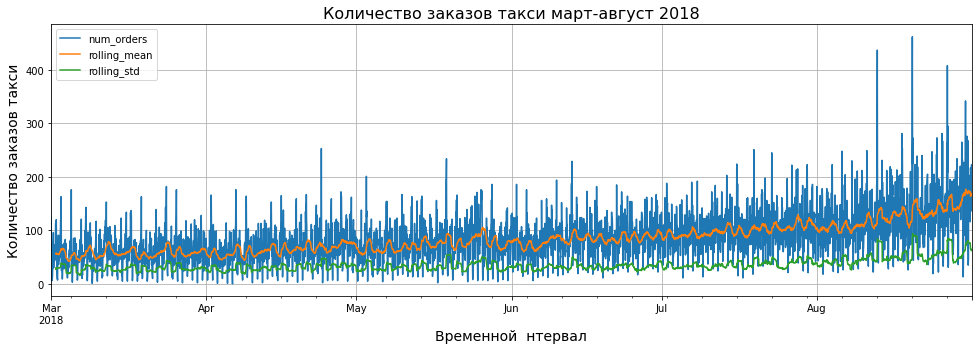

In [8]:
pd.DataFrame({data['num_orders'].name: data['num_orders'], 'rolling_mean': data['num_orders'].rolling(24).mean(),
                  'rolling_std': data['num_orders'].rolling(24).std()}).plot(figsize=(16.5, 5))
plt.grid()
plt.xlabel('Временной  нтервал', fontsize=14)
plt.ylabel('Количество заказов такси', fontsize=14)
plt.title('Количество заказов такси март-август 2018', fontsize=16)
plt.show()

По графику сложно сказать о стационарности, видим рост всех параметров. 


Для более детального анализа необходимо построить поиндексовые графики количества заказов, а также графики сезонности, тренда и график разностного временного ряда.

При обучении и анализе нам понадобятся разделенные признаки данных, поэтому напишем функцию создания датафрейма с этими признаками.

In [9]:
def make_features(data, rolling_mean_size = 0, max_lag = 0):
    df = data.copy()
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour
    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
    df['rolling_mean'] = df['num_orders'].shift().rolling(rolling_mean_size).mean()
    return df

### Поиндексовые графики

Для построения графиков понадобятся календарные индексы, создадим датафрейм с признаками.

In [10]:
df = make_features(data)

#### График по месяцам

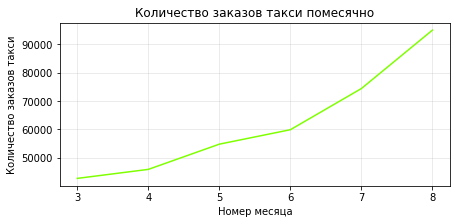

In [12]:
df['month'] = data.index.month
df.groupby('month')['num_orders'].sum().plot(figsize=(7, 3), color='chartreuse')
plt.xlabel('Номер месяца')
plt.ylabel('Количество заказов такси')
plt.title('Количество заказов такси помесячно')
plt.grid(axis='both', alpha=.3)

Видно прямое возрастание числа заказов с марта по август.

#### График по дням недели

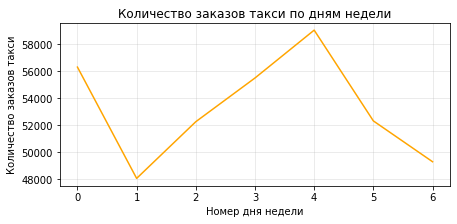

In [13]:
df.groupby('dayofweek')['num_orders'].sum().plot(figsize=(7, 3), color='orange')
plt.xlabel('Номер дня недели')
plt.ylabel('Количество заказов такси')
plt.title('Количество заказов такси по дням недели')
plt.grid(axis='both', alpha=.3)

По графику видно резкое подение количества заказов с понедельника по вторник и с пятницы по воскресенье. Со ворника по пятницу количество заказов растет.

#### График по часам

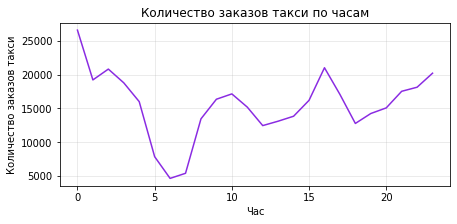

In [14]:
df.groupby('hour')['num_orders'].sum().plot(figsize=(7, 3), color='blueviolet')
plt.xlabel('Час')
plt.ylabel('Количество заказов такси')
plt.title('Количество заказов такси по часам')
plt.grid(axis='both', alpha=.3)

На графике видим падение числа заказов с 0 часов до 6 утра и последующее повышение до 24 часов. Повышение и падение неравномерные с наличием всплесков в районе часа ночи, 9-10 утра и 16 вечера.

### Графики сезонности и тренда

In [15]:
decomposed = seasonal_decompose(data) 

#### График тренда

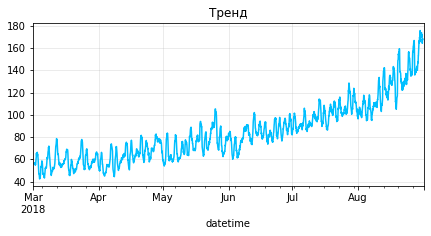

In [16]:
decomposed.trend.plot(ax=plt.gca(), figsize=(7, 3), color='deepskyblue')
plt.title('Тренд')
plt.grid(axis='both', alpha=.3)

Виден четкий тренд на возрастание с марта по август.

Посмотрим только последний месяц.

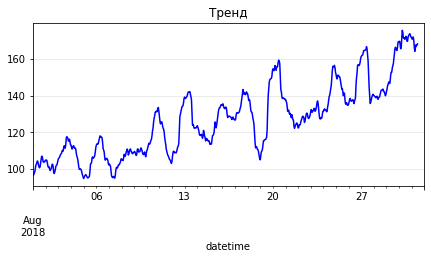

In [17]:
decomposed.trend['2018-08-01':'2018-08-31'].plot(ax=plt.gca(), figsize=(7, 3), color='blue')
plt.title('Тренд')
plt.grid(axis='both', alpha=.3)

Картина в целом такая же. Стоит посмотреть тренд на ресмплировании по дням, а не по часам.

In [18]:
day = seasonal_decompose(data.resample('1D').mean())

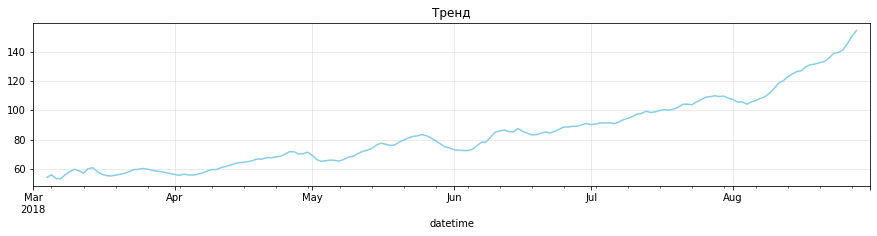

In [19]:
day.trend.plot(ax=plt.gca(), figsize=(15, 3), color='skyblue')
plt.title('Тренд')
plt.grid(axis='both', alpha=.3)

Периодичность в тренде исчезла, однако видим падения тренда в начале каждого месяца.

#### График сезонности

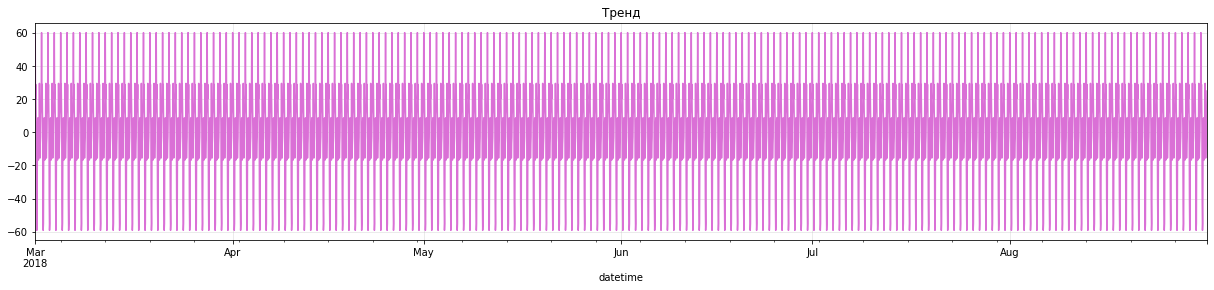

In [20]:
decomposed.seasonal.plot(ax=plt.gca(), figsize=(21, 4), color='orchid')
plt.title('Тренд')
plt.grid(axis='both', alpha=.3)

График довольно нечеткий, хоть и видна сезонность. Рассмотрим график за последний месяц.

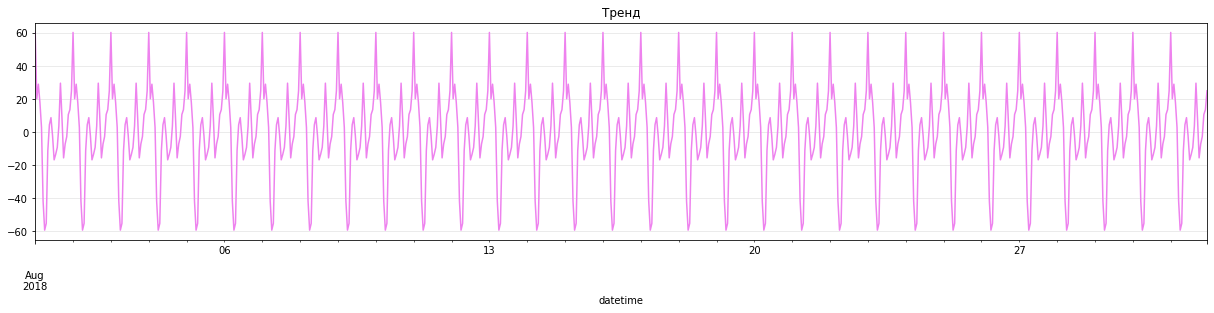

In [21]:
decomposed.seasonal['2018-08-01':'2018-08-31'].plot(ax=plt.gca(), figsize=(21, 4), color='violet')
plt.title('Тренд')
plt.grid(axis='both', alpha=.3)

Видим четкую сезонность по дням. Посмотрим на график последнего месяца при ресемплирования по дням.

In [22]:
week = seasonal_decompose(data.resample('1D').mean())

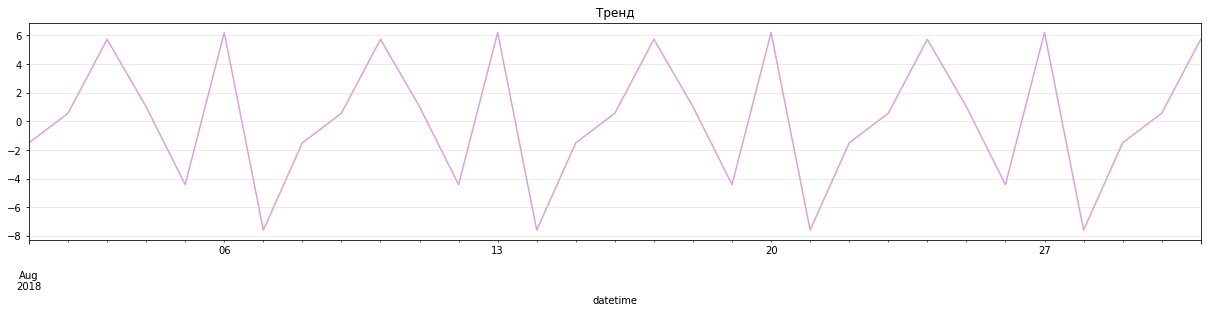

In [23]:
week.seasonal['2018-08-01':'2018-08-31'].plot(ax=plt.gca(), figsize=(21, 4), color='plum')
plt.title('Тренд')
plt.grid(axis='both', alpha=.3)

Можно сказать, что количество заказов зависит от дня недели.

#### График остатков

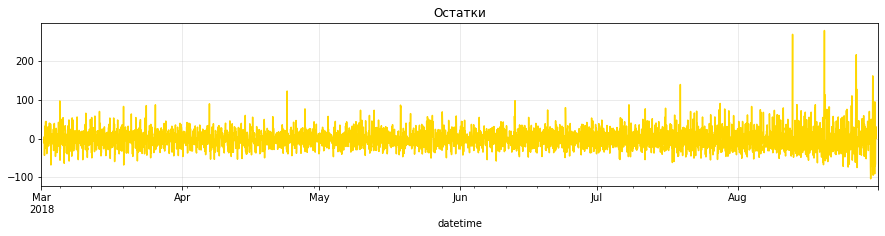

In [24]:
decomposed.resid.plot(ax=plt.gca(), figsize=(15, 3), color='gold')
plt.title('Остатки')
plt.grid(axis='both', alpha=.3)

График нечеткий, посмотрим сравнение графиков первого (март) и последнего (август) месяцев.

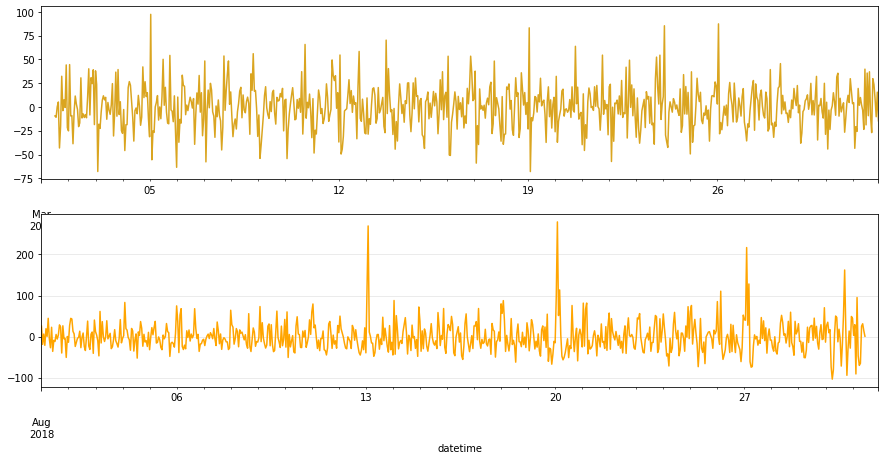

In [25]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 7))
decomposed.resid['2018-03-01':'2018-03-31'].plot(ax=ax[0], color='goldenrod')
decomposed.resid['2018-08-01':'2018-08-31'].plot(ax=ax[1], color='orange')
plt.grid(axis='both', alpha=.3)

Сравнивая графики, можем сказать, что к концу выборки доля остатков возрастает, по сравнению с началом.

Таким образом из графиков можно сказать:
- Тренд растет почти равномерно, однако есть провалы в начале каждого месяца
- Имеется посуточная сезонность
- Количество заказов зависит от часа суток, дня недели

### График разностного временного ряда
Построим временной ряд на разности с соседними значениями

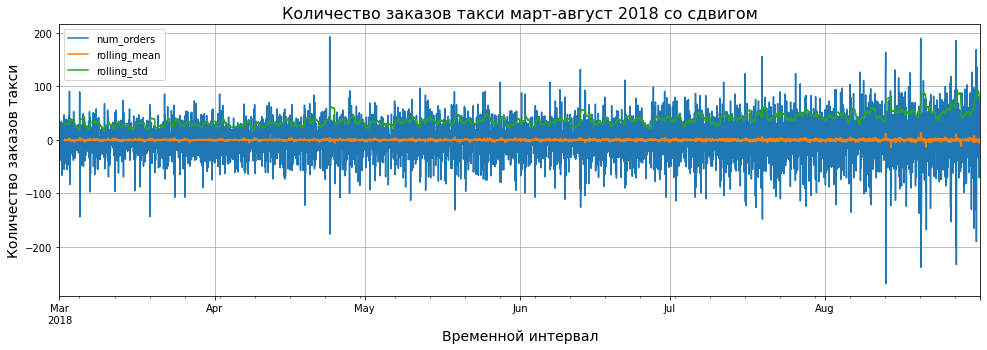

In [26]:
data_shift = data - data.shift()
pd.DataFrame({data_shift['num_orders'].name: data_shift['num_orders'], 
              'rolling_mean': data_shift['num_orders'].rolling(24).mean(),
                  'rolling_std': data_shift['num_orders'].rolling(24).std()}).plot(figsize=(16.5, 5))
plt.grid()
plt.xlabel('Временной интервал', fontsize=14)
plt.ylabel('Количество заказов такси', fontsize=14)
plt.title('Количество заказов такси март-август 2018 со сдвигом', fontsize=16)
plt.show()

Ряд достаточно стационарен, его среднее значение и стандартное отклонение не сильно меняются.

Проведем тест Дики-Фуллера.

In [27]:
result = adfuller(data['num_orders'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical values:')
for key, value in result[4].items():
  print('\t {}: {}'.format(key, value))

ADF Statistic: -3.0689242890279558
p-value: 0.028940051402612906
Critical values:
	 1%: -3.431842162413052
	 5%: -2.8621993540813637
	 10%: -2.567120978470452


p-value меньше порогового значения в 0.05, значит можно точно сказать, что ряд стационарный.

### Коэффициенты автокорелляции

Посмотрим на график коэффициентов автокорелляции, чтобы выяснить оптимально подходящий размера окна для скользащего среднего.

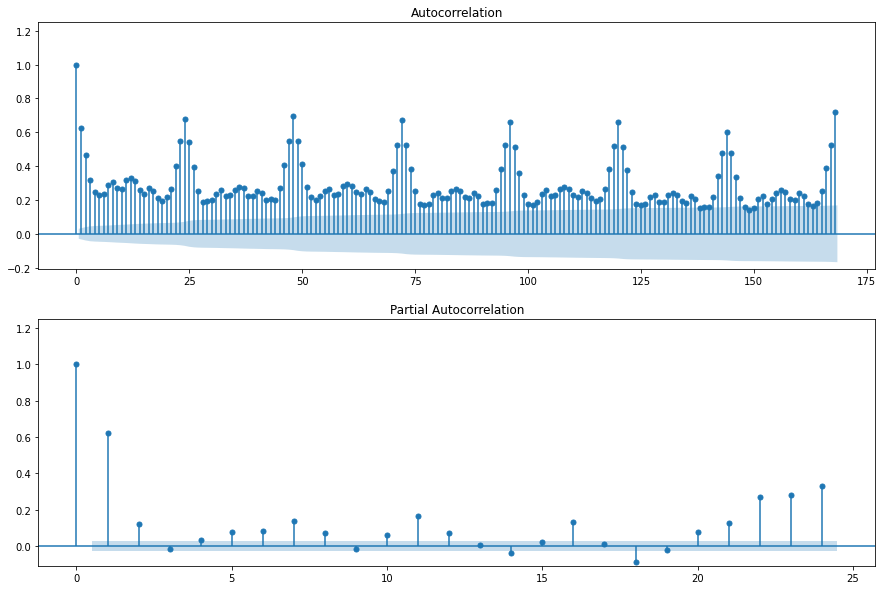

In [28]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
plot_acf(data['num_orders'], ax=ax[0], lags=24*7, auto_ylims=True);
plot_pacf(data['num_orders'], ax=ax[1], lags=24, auto_ylims=True);

По графикам видим, что все коэффициенты автокорелляции выше порога значимости как для недельного интервала, так и для суточного. В целом будет достаточным взять отстающие признаки 24, а скользящее среднее 10.

Теперь можем создать датафрейм с признаками, по которому будем производить обучение моделей.

In [29]:
df = make_features(data, 10, 24)

При создании лаговых переменных могут появится пропуски, поэому проверим их наличие.

In [30]:
df.isna().sum()

num_orders       0
day              0
dayofweek        0
hour             0
lag_1            1
lag_2            2
lag_3            3
lag_4            4
lag_5            5
lag_6            6
lag_7            7
lag_8            8
lag_9            9
lag_10          10
lag_11          11
lag_12          12
lag_13          13
lag_14          14
lag_15          15
lag_16          16
lag_17          17
lag_18          18
lag_19          19
lag_20          20
lag_21          21
lag_22          22
lag_23          23
lag_24          24
rolling_mean    10
dtype: int64

Пропуски найдены, удалим их.

In [31]:
df.dropna(inplace=True)
df.isna().sum()

num_orders      0
day             0
dayofweek       0
hour            0
lag_1           0
lag_2           0
lag_3           0
lag_4           0
lag_5           0
lag_6           0
lag_7           0
lag_8           0
lag_9           0
lag_10          0
lag_11          0
lag_12          0
lag_13          0
lag_14          0
lag_15          0
lag_16          0
lag_17          0
lag_18          0
lag_19          0
lag_20          0
lag_21          0
lag_22          0
lag_23          0
lag_24          0
rolling_mean    0
dtype: int64

**Вывод этапа**:
- Написана функция для создания датафрейма с разделенными признаками. 
- Построены различные графики по индексам, из которых выяснили:
    * Количество заказов плавно помесячно возрастает
    * Происходит резкое подение количества заказов с понедельника по вторник и с пятницы по воскресенье. Со ворника по пятницу количество заказов растет
    * Падение числа заказов с 0 часов до 6 утра и последующее повышение до конца дня. Повышение и падение неравномерное с наличием всплесков в районе часа ночи, 9-10 утра и 16 вечера.
- Построены графики сезонности, из которых можно сказать:
    * Тренд растет почти равномерно, однако есть провалы в начале каждого месяца
    * Имеется посуточная сезонность
    * Количество заказов зависит от часа суток, дня недели
- Построен график разностного времени и проаеден тест Дики-Фуллера, которые однозначно доказали стационарность ряда.
- Проведено исследование коэфициентов автокорреляции для недельного и дневного интервалов, из которых стало поянтно, что  оптимальный размер окна для скользащего среднего - сутки.
- Проверено появление пустых значений в новом датафрейме с разделенными признаками (найденные признаки удалены).

## Обучение

Обучать будем модели линейной регрессии, CatBoostRegressor и LGBMRegressor.

Для обучения разделим данные на обучающую и тестовую выборки.

In [32]:
train, test = train_test_split(df, shuffle=False, test_size=0.1)
train = train.dropna()

features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']
 
features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

Проверим выборки.

In [33]:
display(train.shape)
display(test.shape)
print(train.index.min(), "  ",train.index.max())
print(test.index.min(), "  ", test.index.max())

(3952, 29)

(440, 29)

2018-03-02 00:00:00    2018-08-13 15:00:00
2018-08-13 16:00:00    2018-08-31 23:00:00


Спрогнозируем модель по прошлому ряду.

In [34]:
pred_previous = np.ones(test.shape)*test.shift(fill_value = test.iloc[-1]['num_orders'])
print("RMSE:", round(np.sqrt(mse(test, pred_previous)),2))

RMSE: 55.37


### Линейная регрессия

In [35]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 123)
hyper_params = [{'n_features_to_select': list(range(1, 14))}]

In [48]:
%%time
lin = LinearRegression()
lin.fit(features_train, target_train)
rfe = RFE(lin)             
model = GridSearchCV(estimator = rfe, param_grid = hyper_params, scoring= 'neg_root_mean_squared_error', cv = folds, verbose = 1,
                        return_train_score=True)      

model.fit(features_train, target_train)

display(model.best_score_*-1)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


26.297199593490564

CPU times: user 17 s, sys: 19.7 s, total: 36.6 s
Wall time: 36.8 s


### CatBoostRegressor

In [37]:
tscv = TimeSeriesSplit(n_splits = 5)
common_cv_params = {'scoring': 'neg_root_mean_squared_error', 'return_train_score': True, 'cv': tscv}

In [38]:
%%time
params = {'max_depth': [4, 6, 8], 'learning_rate': [0.05, 0.1, 0.2]}
grid_ctb = GridSearchCV(CatBoostRegressor(loss_function='RMSE', random_state=123, verbose=False),
                       param_grid = params, n_jobs=-1, **common_cv_params)
grid_ctb.fit(features_train, target_train)

display(grid_ctb.best_score_*-1)

24.1890545333411

CPU times: user 4min 43s, sys: 7.02 s, total: 4min 50s
Wall time: 5min 29s


### LightGBM

In [44]:
%%time
params = {'max_depth': [10, 20, 30, 40, 50],'learning_rate': [0.05, 0.1, 0.2],'num_leaves': [50, 100, 250],
          'n_estimators': [200, 500]}
grid_lgb = GridSearchCV(LGBMRegressor(metric='rmse', random_state=123),
                        param_grid=params, n_jobs=-1, **common_cv_params)
grid_lgb.fit(features_train, target_train)

display(grid_lgb.best_params_)
display(grid_lgb.best_score_*-1)

22.69712755232183

CPU times: user 13min 3s, sys: 14.2 s, total: 13min 17s
Wall time: 15min 35s


**Вывод этапа**:
- Проведено разделение данных на тестовую и тренировочную выборки.
- Обучены модели и получены значения метрики RMSE: `LinearRegression` - 26.30, `CatBoostRegressor` - 24.19 и `LightGBM` - 22.70.

## Тестирование

Проведем тестирование всех моделей.

In [49]:
%%time
predict_l = model.predict(features_test)
rmse_l = mse(target_test, predict_l)**0.5
print("RMSE LinearRegression:", rmse_l)

RMSE LinearRegression: 45.418031884794445
CPU times: user 4.79 ms, sys: 47 µs, total: 4.84 ms
Wall time: 3.91 ms


In [41]:
%%time
predict_cat = grid_ctb.predict(features_test)
rmse_cat = mse(target_test, predict_cat)**0.5
print("RMSE CatBoostRegressor:", rmse_cat)

RMSE CatBoostRegressor: 39.38452491273987
CPU times: user 3.89 ms, sys: 4 µs, total: 3.9 ms
Wall time: 3.5 ms


In [46]:
%%time
predict_lgb = grid_lgb.predict(features_test)
rmse_lgb = mse(target_test, predict_lgb)**0.5
print("RMSE LightGBM:", rmse_lgb)

RMSE LightGBM: 36.28057279854972
CPU times: user 4.34 ms, sys: 19 µs, total: 4.53 ms
Wall time: 4.1 ms


**Вывод этапа**:
Проведено тестирование моделей со следующими результатами: `LinearRegression`- 45.42, `CatBoostRegressor` - 39.38, `LightGBM` - 36.28.
Лучшей моделью стоит выбрать LightGBM, так как он показывает наилучший результат метрики RMSE на тестовой выборке, хоть и уступает CatBoostRegressor по времени обучения.

## Общий вывод

Итак, нам предоставлены данные компании «Чётенькое такси» о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час.

На этапе подготовки были загружены данные с указанием столбца-индекса, проведена проверка на наличие пропущенных значений, пропусков не обнаружено, а также ресемплированы данных на часовые интервалы и просуммированы заказы на основе этих и нтервалов.

На этапе анализа данных была написана функция для создания датафрейма с разделенными признаками, а также проверено появление пустых значений в новом датафрейме с разделенными признаками (найденные пизнаки удалены).
Построены различные графики по индексам, из которых выяснили:
   * Количество заказов плавно помесячно возрастает
   * Происходит резкое подение количества заказов с понедельника по вторник и с пятницы по воскресенье. Со ворника по пятницу количество заказов растет
   * Падение числа заказов с 0 часов до 6 утра и последующее повышение до конца дня. Повышение и падение неравномерное с наличием всплесков в районе часа ночи, 9-10 утра и 16 вечера.
Построены графики сезонности, из которых можно сказать:
   * Тренд растет почти равномерно, однако есть провалы в начале каждого месяца
   * Имеется посуточная сезонность
   * Количество заказов зависит от часа суток, дня недели
Построен график разностного времени и проаеден тест Дики-Фуллера, которые однозначно доказали стационарность ряда. И в конце проведено исследование коэфициентов автокорреляции для недельного и дневного интервалов, из которых стало поянтно, что  оптимальный размер окна для скользащего среднего - сутки.

Для дальнейшего обучения моделей данные разделены на тестовую и тренировочную выборки. Для проверки на метрику RMSE и обучения выбраны 3 модели, на которых получены результаты: `LinearRegression` - 26.30, `CatBoostRegressor` - 24.19 и `LightGBM` - 22.70.

Дальнейшее тестирование моделей дало следуюшие результаты метрики RMSE: `LinearRegression`- 45.42, `CatBoostRegressor` - 39.38, `LightGBM` - 36.28.
Лучшей моделью стоит выбрать LightGBM, так как он показывает наилучший результат метрики RMSE на тестовой выборке, хоть и уступает CatBoostRegressor по времени обучения.